reco dark photon $Z_d(\rightarrow\mu^+\mu^-)$ as lepton-jet/muon-pair -- $\Delta R$ matching between ($Z_d$, lepton-jet/muon pair)

>NOTE: the sample used here are $2\mu2e$ sigal samples with $m_{\chi\bar{\chi}}$=500GeV, $m_{Z_d}$={0.25, 1.2, 5}GeV, $\bar{lxy}$=150cm

In [15]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend
from rootpy.plotting.shapes import Line

In [2]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToMu__TREE.root')
f = root_open(fn)

In [3]:
f.keys()

[Key('mulj')]

In [4]:
t=f.mulj
sorted(t.branchnames)

['dp_daudr',
 'dp_eta',
 'dp_lxy',
 'dp_lz',
 'dp_pt',
 'dsa_m_extrpdr',
 'dsa_m_gendr',
 'dsa_m_ncschits',
 'dsa_m_ndthits',
 'dsa_m_normchi2',
 'dsa_m_nsta',
 'dsa_m_pt',
 'dsa_m_pterrptinv',
 'dsa_m_samesign',
 'dsa_p_extrpdr',
 'dsa_p_gendr',
 'dsa_p_ncschits',
 'dsa_p_ndthits',
 'dsa_p_normchi2',
 'dsa_p_nsta',
 'dsa_p_pt',
 'dsa_p_pterrptinv',
 'dsa_p_samesign',
 'dsa_pm_pt',
 'dsa_pm_same',
 'genmu_m_eta',
 'genmu_m_pt',
 'genmu_p_eta',
 'genmu_p_pt',
 'lj_gendr',
 'lj_ndsa',
 'lj_pt',
 'lj_type',
 'mu_m_gendr',
 'mu_m_pt',
 'mu_m_samesign',
 'mu_m_selector',
 'mu_m_type',
 'mu_p_gendr',
 'mu_p_pt',
 'mu_p_samesign',
 'mu_p_selector',
 'mu_p_type',
 'mu_pm_pt',
 'mu_pm_same',
 's_LXY',
 's_MA',
 's_MXX']

In [5]:
set_style(MyStyle())
canvas = Canvas(500, 400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


# gen info

## dark photon

In [26]:
dplxy = t.Draw('dp_lxy')

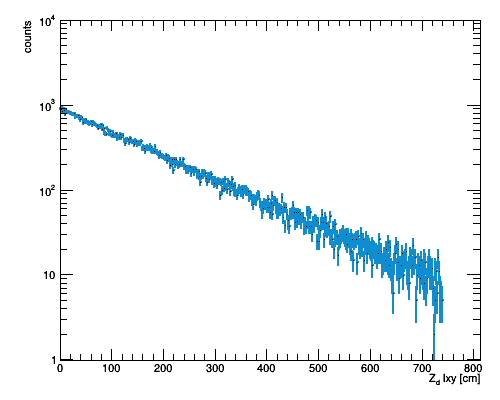

In [28]:
canvas.clear()

dplxy.linecolor=sigCOLORS[0]
dplxy.linewidth=2
draw([dplxy],pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
canvas.draw()

In [29]:
dplz = t.Draw('dp_lz')

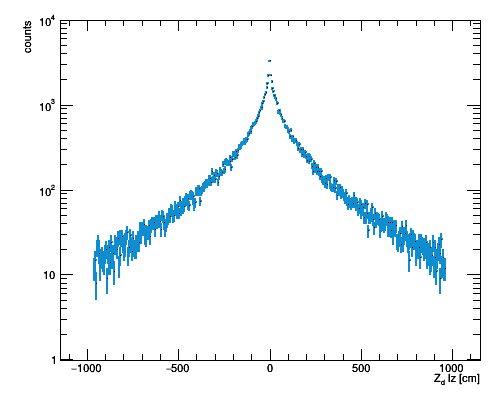

In [30]:
canvas.clear()

dplz.linecolor=sigCOLORS[0]
dplz.linewidth=2
draw([dplz],pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lz [cm]', ytitle='counts')
canvas.draw()

In [31]:
dppt = t.Draw('dp_pt')

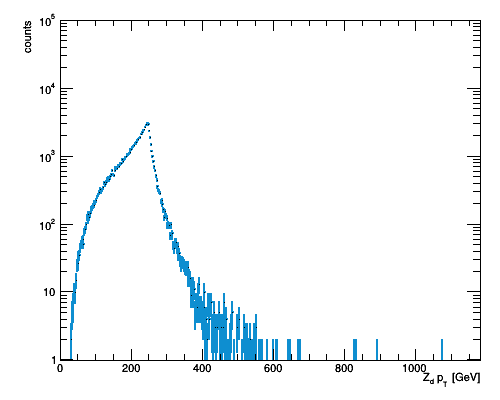

In [32]:
canvas.clear()

dppt.linecolor=sigCOLORS[0]
dppt.linewidth=2
draw([dppt],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} p_{T} [GeV]', ytitle='counts')
canvas.draw()

In [33]:
dpeta = t.Draw('dp_eta')

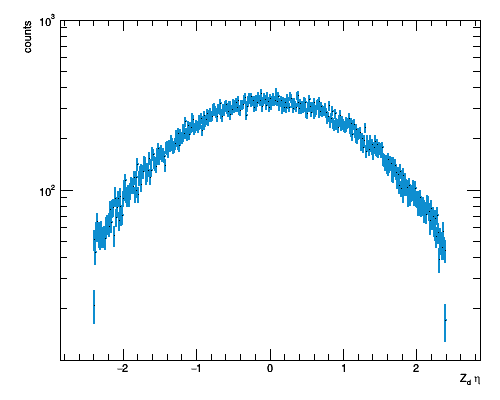

In [36]:
canvas.clear()

dpeta.linecolor=sigCOLORS[0]
dpeta.linewidth=2
draw([dpeta],pad=canvas, logy=True, ylimits=(10,1e3), xtitle='Z_{d} #eta', ytitle='counts')
canvas.draw()

In [37]:
dpdaudr = t.Draw('dp_daudr')

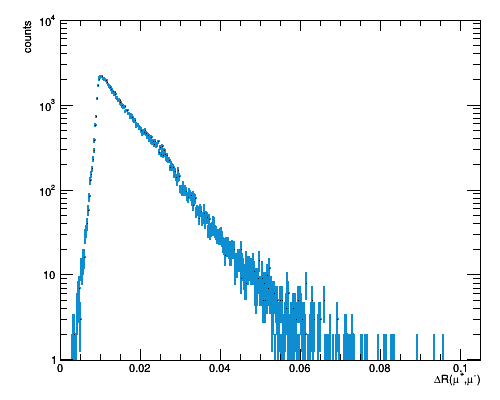

In [39]:
canvas.clear()

dpdaudr.linecolor=sigCOLORS[0]
dpdaudr.linewidth=2
draw([dpdaudr],pad=canvas, logy=True,  ylimits=(1,1e4), xtitle='#DeltaR(#mu^{+},#mu^{-})', ytitle='counts')
canvas.draw()

## gen muon info

In [40]:
genmu_m_pt = t.Draw(t.b.genmu_m_pt>>('genmu_m_pt', 500, 0, 500))
genmu_p_pt = t.Draw(t.b.genmu_p_pt>>('genmu_p_pt', 500, 0, 500))

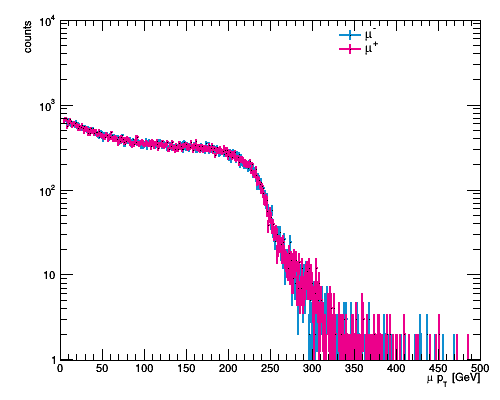

In [41]:
canvas.clear()

genmu_m_pt.linecolor=sigCOLORS[0]
genmu_m_pt.linewidth=2
genmu_p_pt.linecolor=sigCOLORS[1]
genmu_p_pt.linewidth=2
draw([genmu_m_pt, genmu_p_pt], logy=True, ylimits=(1,1e4), xtitle='#mu p_{T} [GeV]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(genmu_m_pt, '#mu^{-}', 'LEP')
leg.AddEntry(genmu_p_pt, '#mu^{+}', 'LEP')
leg.Draw()
canvas.draw()

In [42]:
genmu_m_eta = t.Draw(t.b.genmu_m_eta>>('genmu_m_eta', 100, -2.5, 2.5))
genmu_p_eta = t.Draw(t.b.genmu_p_eta>>('genmu_p_eta', 100, -2.5, 2.5))

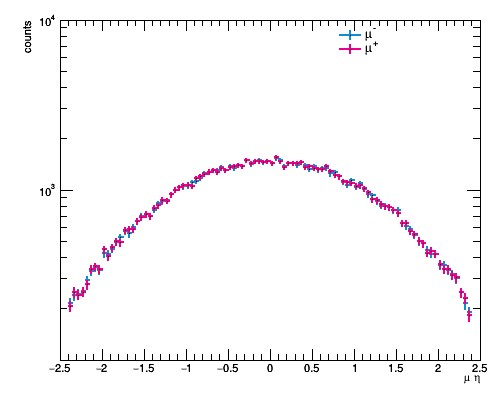

In [43]:
canvas.clear()

genmu_m_eta.linecolor=sigCOLORS[0]
genmu_m_eta.linewidth=2
genmu_p_eta.linecolor=sigCOLORS[1]
genmu_p_eta.linewidth=2
draw([genmu_m_eta, genmu_p_eta], logy=True, ylimits=(1e2,1e4), xtitle='#mu #eta', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(genmu_m_pt, '#mu^{-}', 'LEP')
leg.AddEntry(genmu_p_pt, '#mu^{+}', 'LEP')
leg.Draw()
canvas.draw()

# reco lepton-jet

### efficiency

In [6]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'lj_gendr>0')
dplxy_passed_type1 = t.Draw(t.b.dp_lxy>>('dplxy_passed_type1', 500, 0, 750), 'lj_gendr>0&lj_type==1')
dplxy_passed_type2 = t.Draw(t.b.dp_lxy>>('dplxy_passed_type2', 500, 0, 750), 'lj_gendr>0&lj_type==2')
dplxy_passed_2dsa = t.Draw(t.b.dp_lxy>>('dplxy_passed_2dsa', 500, 0, 750), 'lj_gendr>0&lj_ndsa>=2')

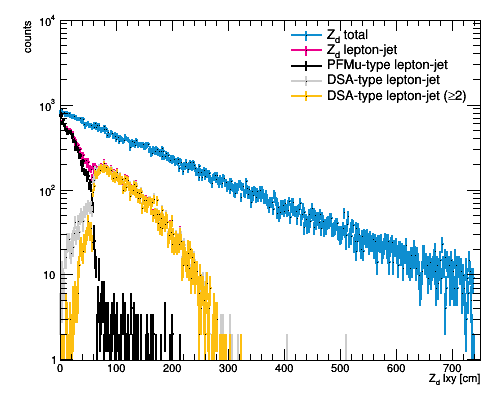

In [48]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2
dplxy_passed_type1.linecolor=sigCOLORS[2]
dplxy_passed_type1.linewidth=2
dplxy_passed_type2.linecolor=sigCOLORS[3]
dplxy_passed_type2.linewidth=2

dplxy_passed_2dsa.linecolor=sigCOLORS[4]
dplxy_passed_2dsa.linewidth=2

draw([dplxy_total, dplxy_passed, dplxy_passed_type1, dplxy_passed_type2, dplxy_passed_2dsa],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(5, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplxy_passed_type1, 'PFMu-type lepton-jet', 'LEP')
leg.AddEntry(dplxy_passed_type2, 'DSA-type lepton-jet', 'LEP')
leg.AddEntry(dplxy_passed_2dsa, 'DSA-type lepton-jet (#geq2)', 'LEP')
leg.Draw()
canvas.draw()

In [7]:
ljeffi_g = Efficiency(dplxy_passed, dplxy_total).graph
ljeffi_g_type1 = Efficiency(dplxy_passed_type1, dplxy_total).graph
ljeffi_g_type2 = Efficiency(dplxy_passed_type2, dplxy_total).graph

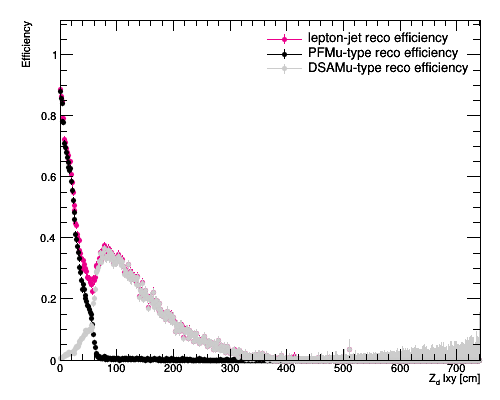

In [8]:
canvas.clear()

ljeffi_g.drawstyle='APZ0'
ljeffi_g.markercolor=sigCOLORS[1]
ljeffi_g.linecolor=sigCOLORS[1]
ljeffi_g.markersize=0.5
ljeffi_g_type1.drawstyle='PZ0'
ljeffi_g_type1.markercolor=sigCOLORS[2]
ljeffi_g_type1.linecolor=sigCOLORS[2]
ljeffi_g_type1.markersize=0.5
ljeffi_g_type2.drawstyle='PZ0'
ljeffi_g_type2.markercolor=sigCOLORS[3]
ljeffi_g_type2.linecolor=sigCOLORS[3]
ljeffi_g_type2.markersize=0.5
draw([ljeffi_g, ljeffi_g_type1, ljeffi_g_type2], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(ljeffi_g_type1, 'PFMu-type reco efficiency', 'LEP')
leg.AddEntry(ljeffi_g_type2, 'DSAMu-type reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [35]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'lj_gendr>0')
dplz_passed_type1 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_type1', 500, 0, 750), 'lj_gendr>0&lj_type==1')
dplz_passed_type2 = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_type2', 500, 0, 750), 'lj_gendr>0&lj_type==2')
dplz_passed_2dsa = t.Draw(abs(t.b.dp_lz)>>('dplz_passed_2dsa', 500, 0, 750), 'lj_gendr>0&lj_ndsa>=2')

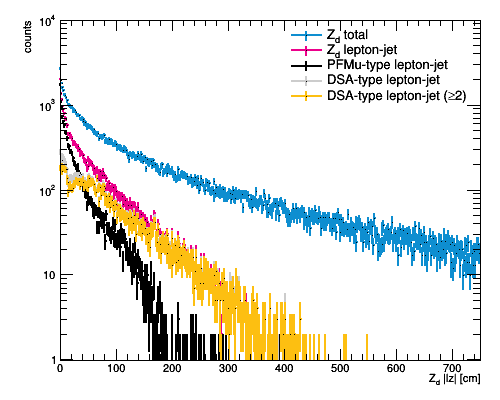

In [52]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2
dplz_passed_type1.linecolor=sigCOLORS[2]
dplz_passed_type1.linewidth=2
dplz_passed_type2.linecolor=sigCOLORS[3]
dplz_passed_type2.linewidth=2

dplz_passed_2dsa.linecolor=sigCOLORS[4]
dplz_passed_2dsa.linewidth=2

draw([dplz_total, dplz_passed, dplz_passed_type1, dplz_passed_type2, dplz_passed_2dsa],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(5, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplz_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplz_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplz_passed_type1, 'PFMu-type lepton-jet', 'LEP')
leg.AddEntry(dplz_passed_type2, 'DSA-type lepton-jet', 'LEP')
leg.AddEntry(dplz_passed_2dsa, 'DSA-type lepton-jet (#geq2)', 'LEP')
leg.Draw()
canvas.draw()

In [36]:
ljeffi_lzg = Efficiency(dplz_passed, dplz_total).graph
ljeffi_lzg_type1 = Efficiency(dplz_passed_type1, dplz_total).graph
ljeffi_lzg_type2 = Efficiency(dplz_passed_type2, dplz_total).graph

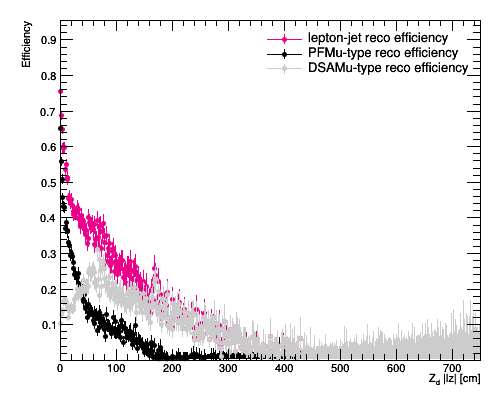

In [55]:
canvas.clear()

ljeffi_lzg.drawstyle='APZ0'
ljeffi_lzg.markercolor=sigCOLORS[1]
ljeffi_lzg.linecolor=sigCOLORS[1]
ljeffi_lzg.markersize=0.5
ljeffi_lzg_type1.drawstyle='PZ0'
ljeffi_lzg_type1.markercolor=sigCOLORS[2]
ljeffi_lzg_type1.linecolor=sigCOLORS[2]
ljeffi_lzg_type1.markersize=0.5
ljeffi_lzg_type2.drawstyle='PZ0'
ljeffi_lzg_type2.markercolor=sigCOLORS[3]
ljeffi_lzg_type2.linecolor=sigCOLORS[3]
ljeffi_lzg_type2.markersize=0.5
draw([ljeffi_lzg, ljeffi_lzg_type1, ljeffi_lzg_type2], xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_lzg, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(ljeffi_lzg_type1, 'PFMu-type reco efficiency', 'LEP')
leg.AddEntry(ljeffi_lzg_type2, 'DSAMu-type reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

remake efficiency wrt. `lxy` (limit range: [0, 300]) w/ `|lz|` cut

In [28]:
LIMIT_LZ = 'abs(dp_lxy)<300'

dplxy300_total  = t.Draw(t.b.dp_lxy>>('dplxy300_total', 300, 0, 300), LIMIT_LZ)
dplxy300_passed = t.Draw(t.b.dp_lxy>>('dplxy300_passed', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0')
dplxy300_passed_type1 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type1', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0&lj_type==1')
dplxy300_passed_type2 = t.Draw(t.b.dp_lxy>>('dplxy300_passed_type2', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0&lj_type==2')
dplxy300_passed_2dsa = t.Draw(t.b.dp_lxy>>('dplxy300_passed_2dsa', 300, 0, 300), LIMIT_LZ+'&lj_gendr>0&lj_ndsa>=2')

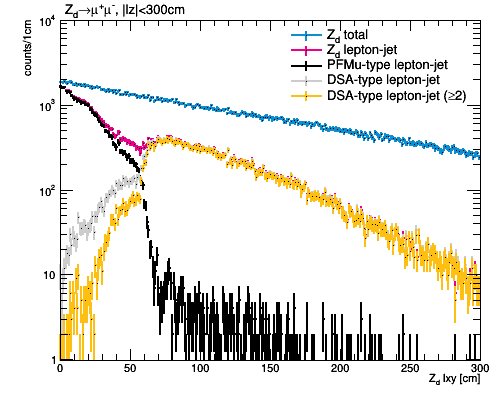

In [29]:
canvas.clear()

dplxy300_total .linecolor=sigCOLORS[0]
dplxy300_total .linewidth=2
dplxy300_passed.linecolor=sigCOLORS[1]
dplxy300_passed.linewidth=2
dplxy300_passed_type1.linecolor=sigCOLORS[2]
dplxy300_passed_type1.linewidth=2
dplxy300_passed_type2.linecolor=sigCOLORS[3]
dplxy300_passed_type2.linewidth=2

dplxy300_passed_2dsa.linecolor=sigCOLORS[4]
dplxy300_passed_2dsa.linewidth=2

draw([dplxy300_total, dplxy300_passed, dplxy300_passed_type1, dplxy300_passed_type2, dplxy300_passed_2dsa],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts/1cm')
leg = Legend(5, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy300_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy300_passed, 'Z_{d} lepton-jet', 'LEP')
leg.AddEntry(dplxy300_passed_type1, 'PFMu-type lepton-jet', 'LEP')
leg.AddEntry(dplxy300_passed_type2, 'DSA-type lepton-jet', 'LEP')
leg.AddEntry(dplxy300_passed_2dsa, 'DSA-type lepton-jet (#geq2)', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d}#rightarrow#mu^{+}#mu^{-}, |lz|<300cm')
title.Draw()
canvas.draw()

In [30]:
ljeffi_lxy300g = Efficiency(dplxy300_passed, dplxy300_total).graph
ljeffi_lxy300g_type1 = Efficiency(dplxy300_passed_type1, dplxy300_total).graph
ljeffi_lxy300g_type2 = Efficiency(dplxy300_passed_type2, dplxy300_total).graph

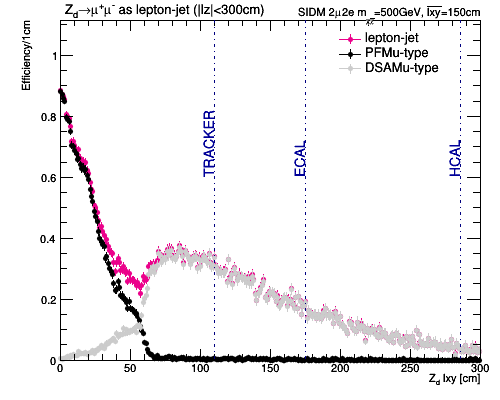

In [37]:
canvas.clear()

ljeffi_lxy300g.drawstyle='APZ0'
ljeffi_lxy300g.markercolor=sigCOLORS[1]
ljeffi_lxy300g.linecolor=sigCOLORS[1]
ljeffi_lxy300g.markersize=0.5
ljeffi_lxy300g_type1.drawstyle='PZ0'
ljeffi_lxy300g_type1.markercolor=sigCOLORS[2]
ljeffi_lxy300g_type1.linecolor=sigCOLORS[2]
ljeffi_lxy300g_type1.markersize=0.5
ljeffi_lxy300g_type2.drawstyle='PZ0'
ljeffi_lxy300g_type2.markercolor=sigCOLORS[3]
ljeffi_lxy300g_type2.linecolor=sigCOLORS[3]
ljeffi_lxy300g_type2.markersize=0.5
draw([ljeffi_lxy300g, ljeffi_lxy300g_type1, ljeffi_lxy300g_type2], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency/1cm')
leg = Legend(3, margin=0.25, leftmargin=0.55,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_lxy300g, 'lepton-jet', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type1, 'PFMu-type', 'LEP')
leg.AddEntry(ljeffi_lxy300g_type2, 'DSAMu-type', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d}#rightarrow#mu^{+}#mu^{-} as lepton-jet (|lz|<300cm)')
title.Draw()
linepos = [110, 175, 286] # tracker, ECAL, HCAL
detectors = ['TRACKER', 'ECAL', 'HCAL']
Y_MIN, Y_MAX = canvas.GetUymin(), canvas.GetUymax()
lines = [Line(i, Y_MIN, i, Y_MAX) for i in linepos]
annotations = [ROOT.TLatex(linepos[i], 0.6, s) for i, s in enumerate(detectors)]
for l in lines:
    l.linestyle='dashdot'
    l.color = 'navy'
    l.Draw()
for s in annotations:
    s.SetTextAlign(11)
    s.SetTextAngle(90)
    s.SetTextSize(0.038)
    s.SetTextColor(ROOT.kBlue+2)
    s.Draw()
    
sampletag = LuminosityLabel('SIDM 2#mu2e m_{#chi#bar{#chi}}=500GeV, #bar{lxy}=150cm')
sampletag.draw()
canvas.draw()

In [7]:
IN_MS = 'dp_lxy<300&abs(dp_lz)<400'

In [8]:
dpeta_total  = t.Draw(t.b.dp_eta>>('dpeta_total',  100, -2.5, 2.5), IN_MS)
dpeta_passed = t.Draw(t.b.dp_eta>>('dpeta_passed', 100, -2.5, 2.5), IN_MS+'&lj_gendr>0')

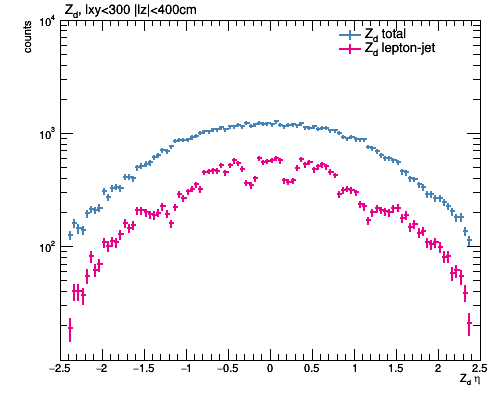

In [9]:
canvas.clear()

dpeta_total .color='steelblue'
dpeta_total .linewidth=2
dpeta_passed.color=sigCOLORS[1]
dpeta_passed.linewidth=2
draw([dpeta_total, dpeta_passed],pad=canvas, logy=True, ylimits=(1e1,1e4), xtitle='Z_{d} #eta', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpeta_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpeta_passed, 'Z_{d} lepton-jet', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d}, lxy<300 |lz|<400cm')
title.Draw()
canvas.draw()

In [10]:
ljeffi_etag = Efficiency(dpeta_passed, dpeta_total).graph

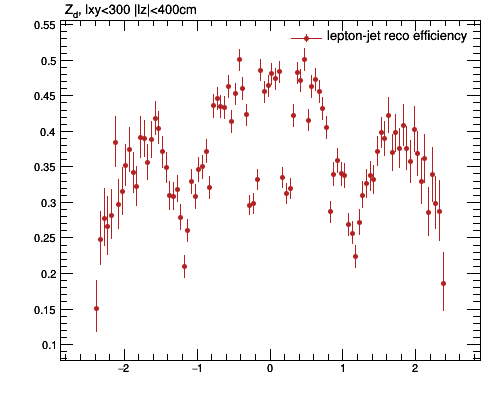

In [11]:
canvas.clear()

ljeffi_etag.drawstyle='APZ'
ljeffi_etag.color='firebrick'
ljeffi_etag.markersize=0.5
draw([ljeffi_etag], pad=canvas, xtitle='Z_{d} #eta', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.45,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_etag, 'lepton-jet reco efficiency', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d}, lxy<300 |lz|<400cm')
title.Draw()
canvas.draw()

In [12]:
dpdaudr_total  = t.Draw(t.b.dp_daudr>>('dpdaudr_total',   100, 0, 0.1), IN_MS)
dpdaudr_passed = t.Draw(t.b.dp_daudr>>('dpdaudr_passed',  100, 0, 0.1), IN_MS+'&lj_gendr>0')

# in near tracker range
IN_NEARTRACKER = 'dp_lxy<60&abs(dp_lz)<60'
dpdaudr_total_type1  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_type1',   100, 0, 0.1), IN_NEARTRACKER)
dpdaudr_passed_type1 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_type1',  100, 0, 0.1), IN_NEARTRACKER+'&lj_gendr>0')

# far tracker up to muon system range
TRACKER_TO_MS = '%s&(!(%s))' % (IN_MS, IN_NEARTRACKER)
dpdaudr_total_type2  = t.Draw(t.b.dp_daudr>>('dpdaudr_total_type2',   100, 0, 0.1), TRACKER_TO_MS)
dpdaudr_passed_type2 = t.Draw(t.b.dp_daudr>>('dpdaudr_passed_type2',  100, 0, 0.1), TRACKER_TO_MS+'&lj_gendr>0')

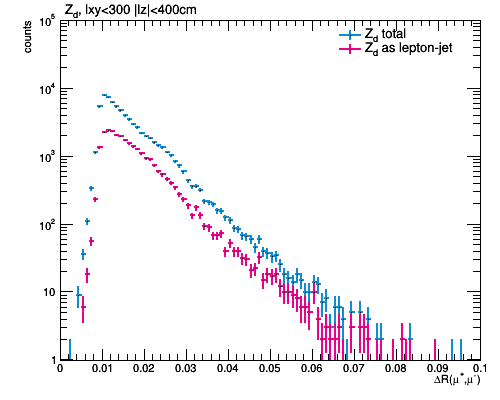

In [13]:
canvas.clear()

dpdaudr_total .linecolor=sigCOLORS[0]
dpdaudr_total .linewidth=2
dpdaudr_passed.linecolor=sigCOLORS[1]
dpdaudr_passed.linewidth=2
draw([dpdaudr_total, dpdaudr_passed],pad=canvas, logy=True, ylimits=(1,1e5), xtitle='#DeltaR(#mu^{+},#mu^{-})', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpdaudr_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpdaudr_passed, 'Z_{d} as lepton-jet', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d}, lxy<300 |lz|<400cm')
title.Draw()
canvas.draw()

In [14]:
ljeffi_daudrg = Efficiency(dpdaudr_passed, dpdaudr_total).graph
ljeffi_daudrg_type1 = Efficiency(dpdaudr_passed_type1, dpdaudr_total_type1).graph
ljeffi_daudrg_type2 = Efficiency(dpdaudr_passed_type2, dpdaudr_total_type2).graph

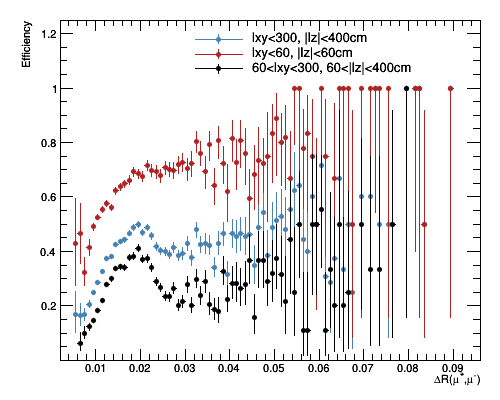

In [15]:
canvas.clear()

ljeffi_daudrg.drawstyle='APZ'
ljeffi_daudrg.markercolor='steelblue'#sigCOLORS[0]
ljeffi_daudrg.linecolor='steelblue'#sigCOLORS[0]
ljeffi_daudrg.markersize=0.5

ljeffi_daudrg_type1.drawstyle='PZ'
ljeffi_daudrg_type1.markercolor='firebrick'#sigCOLORS[1]
ljeffi_daudrg_type1.linecolor='firebrick'#sigCOLORS[1]
ljeffi_daudrg_type1.markersize=0.5

ljeffi_daudrg_type2.drawstyle='PZ'
ljeffi_daudrg_type2.markercolor=sigCOLORS[2]
ljeffi_daudrg_type2.linecolor=sigCOLORS[2]
ljeffi_daudrg_type2.markersize=0.5

draw([ljeffi_daudrg, ljeffi_daudrg_type1, ljeffi_daudrg_type2], xtitle='#DeltaR(#mu^{+},#mu^{-})', ytitle='Efficiency')
leg = Legend(3, margin=0.25, leftmargin=0.25,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_daudrg, 'lxy<300, |lz|<400cm', 'LEP')
leg.AddEntry(ljeffi_daudrg_type1, 'lxy<60, |lz|<60cm', 'LEP')
leg.AddEntry(ljeffi_daudrg_type2, '60<lxy<300, 60<|lz|<400cm', 'LEP')

leg.Draw()
canvas.draw()

### $\Delta R$ matching quality

In [16]:
ljgendr = t.Draw('lj_gendr', 'lj_gendr>0')

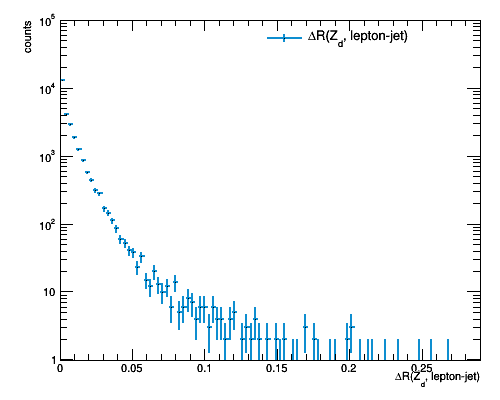

In [18]:
canvas.clear()

ljgendr.linecolor=sigCOLORS[0]
ljgendr.linewidth=2
draw([ljgendr], logy=True, ylimits=(1,1e5), xtitle='#DeltaR(Z_{d}, lepton-jet)', ytitle='counts')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljgendr, '#DeltaR(Z_{d}, lepton-jet)', 'LEP')
leg.Draw()
canvas.draw()

### $p_T$ resolution

In [19]:
ljptreso = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptreso(50, -1, 1.5)', 'lj_gendr>0', 'norm')
ljptreso_type1 = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptreso_type1(50, -1, 1.5)', 'lj_gendr>0&lj_type==1', 'norm')
ljptreso_type2 = t.Draw('(lj_pt-dp_pt)/dp_pt>>ljptreso_type2(50, -1, 1.5)', 'lj_gendr>0&lj_type==2', 'norm')

ljptreso = ljptreso.merge_bins([(-2,-1)])
ljptreso_type1 = ljptreso_type1.merge_bins([(-2,-1)])
ljptreso_type2 = ljptreso_type2.merge_bins([(-2,-1)])

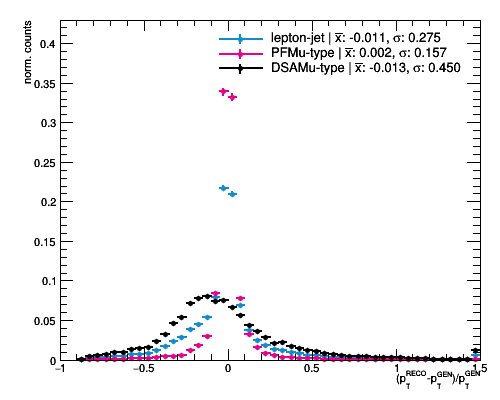

In [23]:
canvas.clear()


ljptreso.color=sigCOLORS[0]
ljptreso_type1.color=sigCOLORS[1]
ljptreso_type2.color=sigCOLORS[2]

for h in [ljptreso, ljptreso_type1, ljptreso_type2]:
    h.markersize=0.5
    h.linewidth=2
ROOT.gPad.SetLogy(0)
draw([ljptreso, ljptreso_type1, ljptreso_type2], pad=canvas, #xlimits=(-1, 1.5),
     xtitle='(p^{RECO}_{T}-p^{GEN}_{T})/p^{GEN}_{T}', ytitle='norm. counts')
leg = Legend(3, margin=0.25, leftmargin=0.3,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljptreso, 'lepton-jet | #bar{x}: %.3f, #sigma: %.3f' % (ljptreso.get_mean(), ljptreso.get_std_dev()), 'LEP')
leg.AddEntry(ljptreso_type1, 'PFMu-type | #bar{x}: %.3f, #sigma: %.3f' % (ljptreso_type1.get_mean(), ljptreso_type1.get_std_dev()), 'LEP')
leg.AddEntry(ljptreso_type2, 'DSAMu-type | #bar{x}: %.3f, #sigma: %.3f' % (ljptreso_type2.get_mean(), ljptreso_type2.get_std_dev()), 'LEP')
leg.Draw()
canvas.draw()

## reco -- muon pair

### efficiency

In [55]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'mu_m_gendr>0&mu_p_gendr>0&mu_pm_same==0')

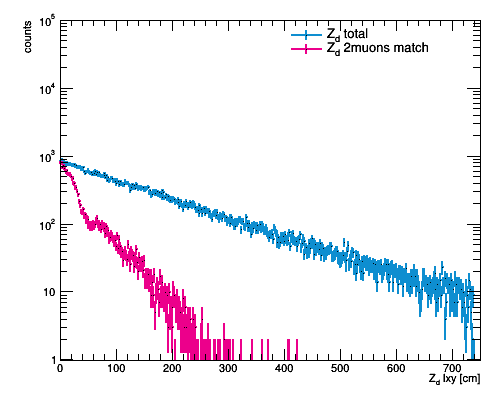

In [26]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2

draw([dplxy_total, dplxy_passed,],
     pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} 2muons match', 'LEP')
leg.Draw()
canvas.draw()

In [27]:
mueffi_g = Efficiency(dplxy_passed, dplxy_total).graph

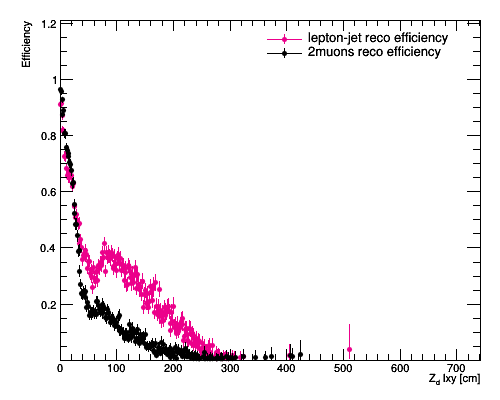

In [31]:
canvas.clear()

ljeffi_g.drawstyle='APZ'
ljeffi_g.markercolor=sigCOLORS[1]
ljeffi_g.linecolor=sigCOLORS[1]
ljeffi_g.markersize=0.5
mueffi_g.drawstyle='PZ'
mueffi_g.markercolor=sigCOLORS[2]
mueffi_g.linecolor=sigCOLORS[2]
mueffi_g.markersize=0.5


draw([ljeffi_g, mueffi_g], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(mueffi_g, '2muons reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

In [56]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'mu_m_gendr>0&mu_p_gendr>0&mu_pm_same==0')

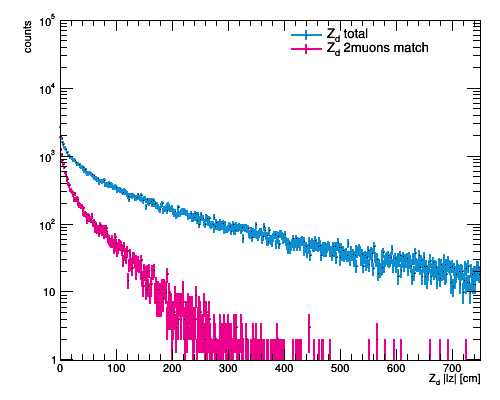

In [33]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2

draw([dplz_total, dplz_passed,],
     pad=canvas, logy=True, ylimits=(1,1e5), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplz_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplz_passed, 'Z_{d} 2muons match', 'LEP')
leg.Draw()
canvas.draw()

In [34]:
mueffi_lzg = Efficiency(dplz_passed, dplz_total).graph

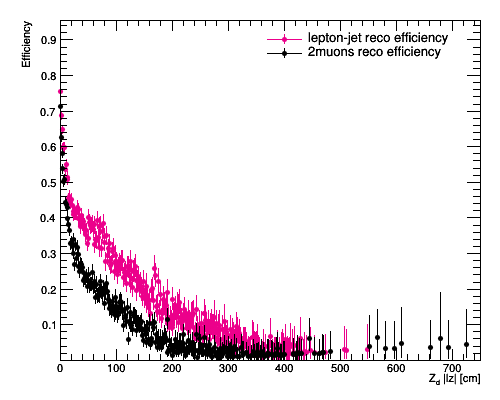

In [37]:
canvas.clear()

ljeffi_lzg.drawstyle='APZ'
ljeffi_lzg.markercolor=sigCOLORS[1]
ljeffi_lzg.linecolor=sigCOLORS[1]
ljeffi_lzg.markersize=0.5
mueffi_lzg.drawstyle='PZ'
mueffi_lzg.markercolor=sigCOLORS[2]
mueffi_lzg.linecolor=sigCOLORS[2]
mueffi_lzg.markersize=0.5


draw([ljeffi_lzg, mueffi_lzg], xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_lzg, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(mueffi_lzg, '2muons reco efficiency', 'LEP')
leg.Draw()
canvas.draw()

**MuonType**: Global, Tracker, Standalone, Calo, PFMuon, RPC, GEM, ME0

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [39]:
mum_types = [t.GetEntries('mu_m_gendr>0&mu_pm_same==0&(mu_m_type&(1<<%d))==(1<<%d)' % (i, i)) for i in range(1,9)]
__mum_types = np.array([float(x) for x in mum_types])/t.GetEntries('mu_m_gendr>0&mu_pm_same==0')

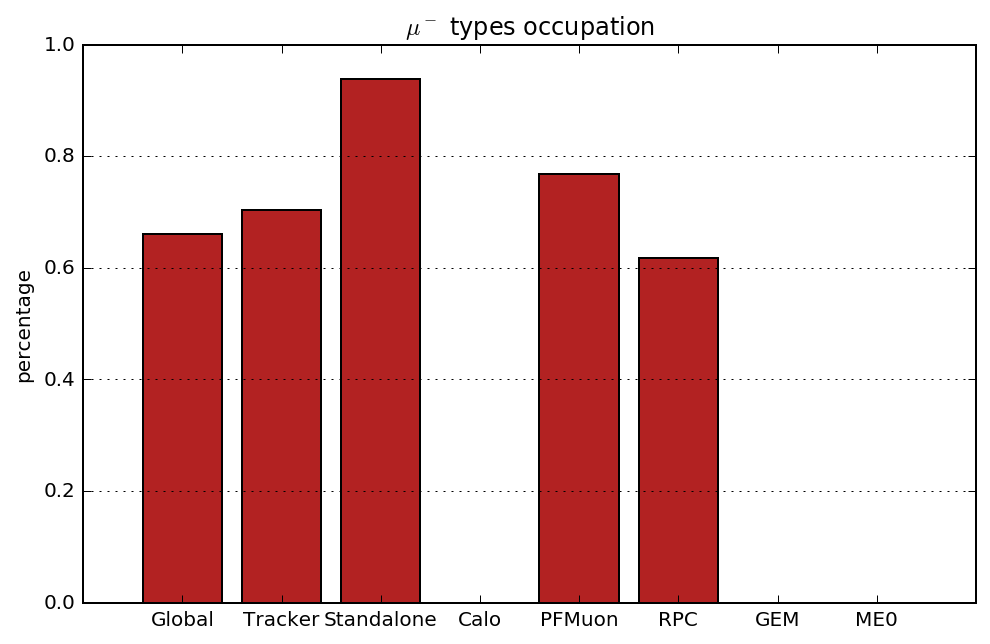

In [40]:
fig, ax = plt.subplots(1,1,figsize=(8, 5))
grade_labels = ['Global', 'Tracker', 'Standalone', 'Calo', 'PFMuon', 'RPC', 'GEM', 'ME0']
xpos = np.arange(len(__mum_types))
ax.bar(xpos, __mum_types, align='center', tick_label=grade_labels, color='firebrick')
ax.set_ylabel('percentage')
# ax.set_ylim(0,1.05)
ax.grid(axis='y', linestyle=':')
ax.set_title('$\mu^-$ types occupation');

In [41]:
mum_ids = [t.GetEntries('mu_m_gendr>0&mu_pm_same==0&(mu_m_selector&(1<<%d))==(1<<%d)' % (i, i)) for i in [0,1,3]]
__mum_ids = np.array([float(x) for x in mum_ids])/t.GetEntries('mu_m_gendr>0&mu_pm_same==0')

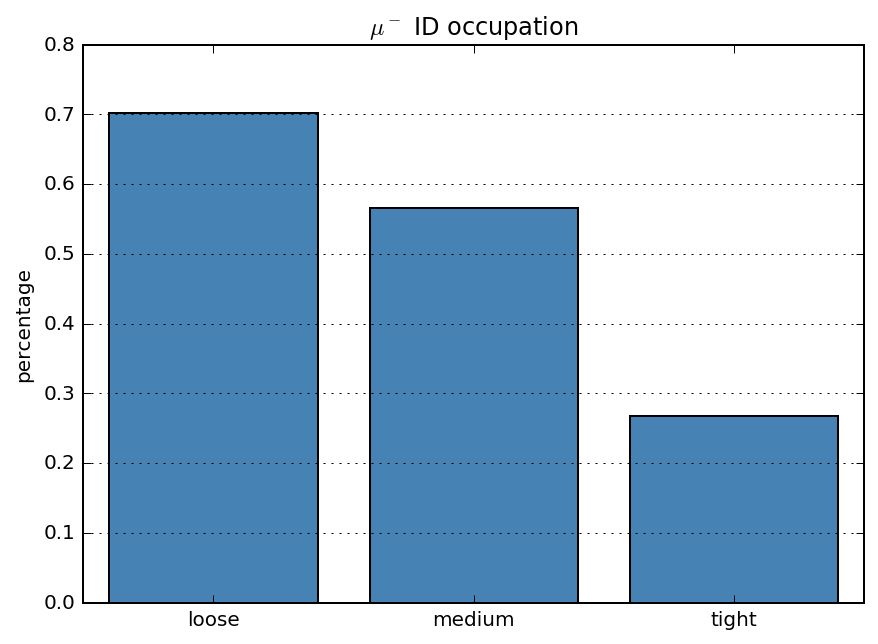

In [43]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
grade_labels = ['loose', 'medium', 'tight']
xpos = np.arange(len(__mum_ids))
ax.bar(xpos, __mum_ids, align='center', tick_label=grade_labels, color='steelblue')
ax.set_ylabel('percentage')
# ax.set_ylim(0,1.05)
ax.grid(axis='y', linestyle=':')
ax.set_title('$\mu^-$ ID occupation');

In [44]:
mup_types = [t.GetEntries('mu_p_gendr>0&mu_pm_same==0&(mu_p_type&(1<<%d))==(1<<%d)' % (i, i)) for i in range(1,9)]
__mup_types = np.array([float(x) for x in mup_types])/t.GetEntries('mu_p_gendr>0&mu_pm_same==0')

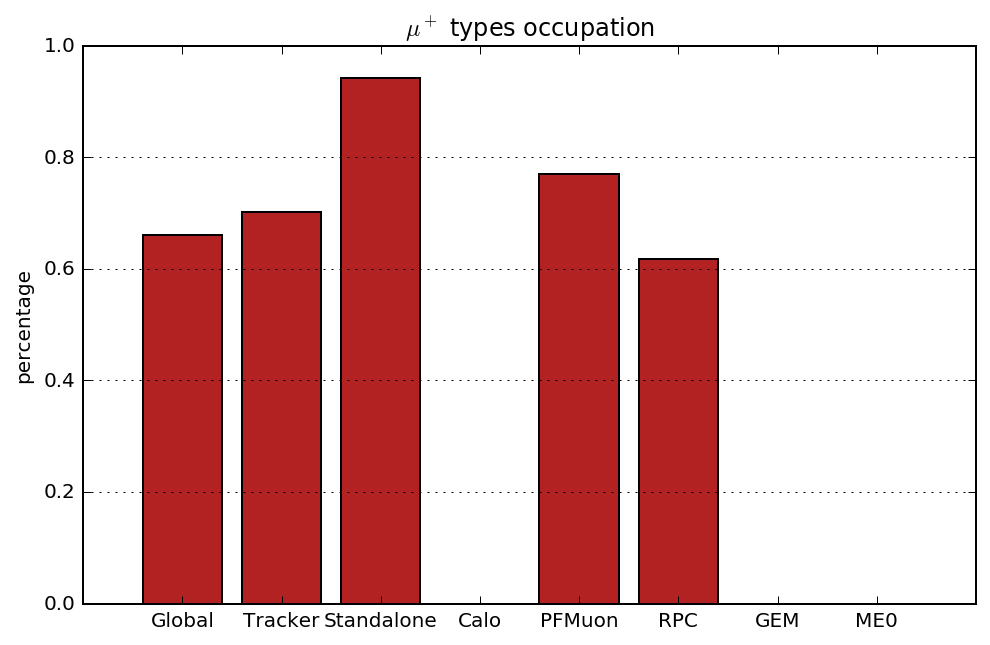

In [45]:
fig, ax = plt.subplots(1,1,figsize=(8, 5))
grade_labels = ['Global', 'Tracker', 'Standalone', 'Calo', 'PFMuon', 'RPC', 'GEM', 'ME0']
xpos = np.arange(len(__mup_types))
ax.bar(xpos, __mup_types, align='center', tick_label=grade_labels, color='firebrick')
ax.set_ylabel('percentage')
# ax.set_ylim(0,1.05)
ax.grid(axis='y', linestyle=':')
ax.set_title('$\mu^+$ types occupation');

In [46]:
mup_ids = [t.GetEntries('mu_p_gendr>0&mu_pm_same==0&(mu_p_selector&(1<<%d))==(1<<%d)' % (i, i)) for i in [0,1,3]]
__mup_ids = np.array([float(x) for x in mup_ids])/t.GetEntries('mu_p_gendr>0&mu_pm_same==0')

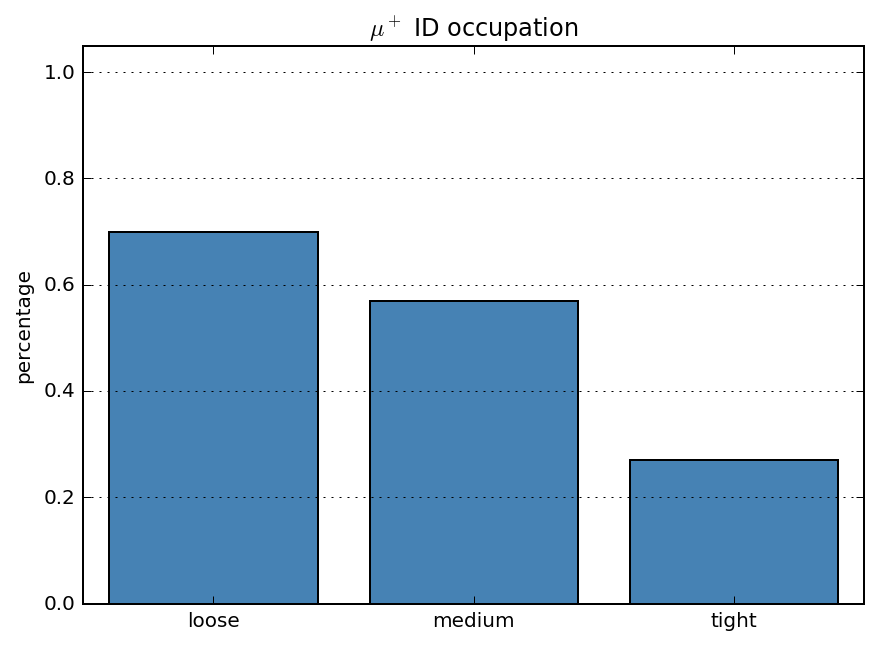

In [48]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
grade_labels = ['loose', 'medium', 'tight']
xpos = np.arange(len(__mup_ids))
ax.bar(xpos, __mup_ids, align='center', tick_label=grade_labels, color='steelblue')
ax.set_ylabel('percentage')
ax.set_ylim(0,1.05)
ax.grid(axis='y', linestyle=':')
ax.set_title('$\mu^+$ ID occupation');

In [49]:
__found_two_muons = 'mu_m_gendr>0&mu_p_gendr>0&mu_pm_same==0'
__two_pf = '((mu_p_type>>5)&1)==1&((mu_m_type>>5)&1)==1'
__two_loose = '((mu_p_selector>>0)&1)==1&((mu_m_selector>>0)&1)==1'

# dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed_2pf = t.Draw(t.b.dp_lxy>>('dplxy_passed_2pf', 500, 0, 750), '&'.join([__found_two_muons, __two_pf]))
dplxy_passed_2pfl = t.Draw(t.b.dp_lxy>>('dplxy_passed_2pfl', 500, 0, 750), '&'.join([__found_two_muons, __two_pf, __two_loose]))

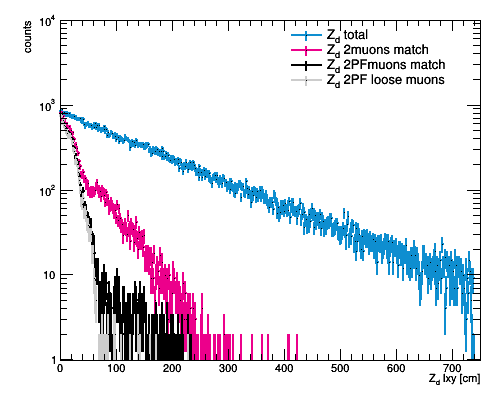

In [57]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2
dplxy_passed_2pf.linecolor=sigCOLORS[2]
dplxy_passed_2pf.linewidth=2
dplxy_passed_2pfl.linecolor=sigCOLORS[3]
dplxy_passed_2pfl.linewidth=2

draw([dplxy_total, dplxy_passed,dplxy_passed_2pf, dplxy_passed_2pfl],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(4, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} 2muons match', 'LEP')
leg.AddEntry(dplxy_passed_2pf, 'Z_{d} 2PFmuons match', 'LEP')
leg.AddEntry(dplxy_passed_2pfl, 'Z_{d} 2PF loose muons', 'LEP')
leg.Draw()
canvas.draw()

In [51]:
mupfleffi_g = Efficiency(dplxy_passed_2pfl, dplxy_total).graph

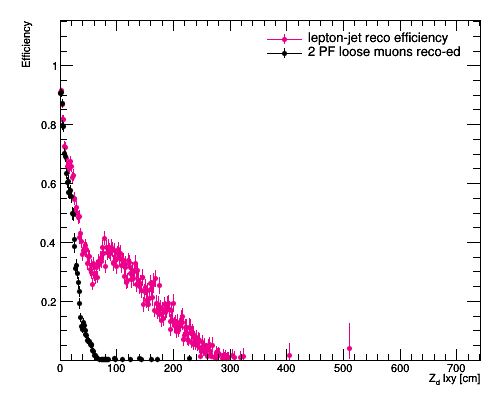

In [58]:
canvas.clear()

ljeffi_g.drawstyle='APZ'
ljeffi_g.markercolor=sigCOLORS[1]
ljeffi_g.linecolor=sigCOLORS[1]
ljeffi_g.markersize=0.5
mupfleffi_g.drawstyle='PZ'
mupfleffi_g.markercolor=sigCOLORS[2]
mupfleffi_g.linecolor=sigCOLORS[2]
mupfleffi_g.markersize=0.5


draw([ljeffi_g, mupfleffi_g], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(2, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(mupfleffi_g, '2 PF loose muons reco-ed', 'LEP')
leg.Draw()
canvas.draw()

In [53]:
__mup_sa = '((mu_p_type>>3)&1)==1&((mu_p_type>>1)&1)==0&((mu_p_type>>2)&1)==0'
__mum_sa = '((mu_m_type>>3)&1)==1&((mu_m_type>>1)&1)==0&((mu_m_type>>2)&1)==0'
__one_pf = '((((mu_p_type>>5)&1)==1&%s)|(%s&((mu_m_type>>5)&1)==1))' % (__mum_sa, __mup_sa)
dplxy_passed_1pf = t.Draw(t.b.dp_lxy>>('dplxy_passed_1pf', 500, 0, 750), '&'.join([__found_two_muons, __one_pf]))
dplxy_passed_0pf = t.Draw(t.b.dp_lxy>>('dplxy_passed_0pf', 500, 0, 750), '&'.join([__found_two_muons, __mup_sa, __mum_sa]))

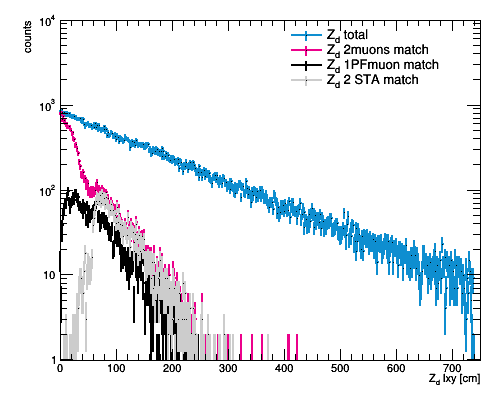

In [59]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2
dplxy_passed_1pf.linecolor=sigCOLORS[2]
dplxy_passed_1pf.linewidth=2
dplxy_passed_0pf.linecolor=sigCOLORS[3]
dplxy_passed_0pf.linewidth=2

draw([dplxy_total, dplxy_passed,dplxy_passed_1pf, dplxy_passed_0pf],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(4, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} 2muons match', 'LEP')
leg.AddEntry(dplxy_passed_1pf, 'Z_{d} 1PFmuon match', 'LEP')
leg.AddEntry(dplxy_passed_0pf, 'Z_{d} 2 STA match', 'LEP')
leg.Draw()
canvas.draw()

In [60]:
mu1pfeffi_g = Efficiency(dplxy_passed_1pf, dplxy_total).graph
mu0pfeffi_g = Efficiency(dplxy_passed_0pf, dplxy_total).graph

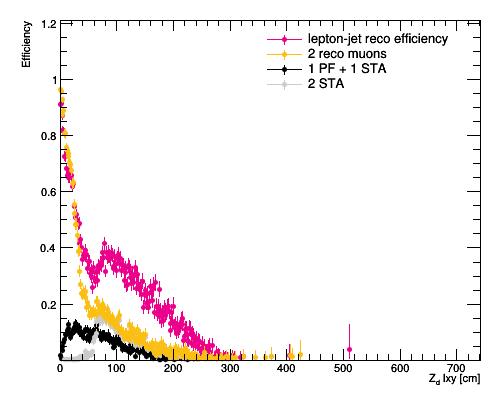

In [61]:
canvas.clear()

ljeffi_g.drawstyle='APZ'
ljeffi_g.color=sigCOLORS[1]
ljeffi_g.markersize=0.5
mu1pfeffi_g.drawstyle='PZ'
mu1pfeffi_g.color=sigCOLORS[2]
mu1pfeffi_g.markersize=0.5
mu0pfeffi_g.drawstyle='PZ'
mu0pfeffi_g.color=sigCOLORS[3]
mu0pfeffi_g.markersize=0.5

mueffi_g.color = sigCOLORS[4]

draw([ljeffi_g, mu1pfeffi_g, mu0pfeffi_g, mueffi_g], xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(4, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(ljeffi_g, 'lepton-jet reco efficiency', 'LEP')
leg.AddEntry(mueffi_g, '2 reco muons', 'LEP')
leg.AddEntry(mu1pfeffi_g, '1 PF + 1 STA', 'LEP')
leg.AddEntry(mu0pfeffi_g, '2 STA', 'LEP')
leg.Draw()
canvas.draw()

In [63]:
mupm_ptreso = t.Draw('(mu_pm_pt-dp_pt)/dp_pt>>mupm_ptreso(50, -1, 1.5)', __found_two_muons, 'norm')
mupm_ptreso_type1 = t.Draw('(mu_pm_pt-dp_pt)/dp_pt>>mupm_ptreso_type1(50, -1, 1.5)', __found_two_muons+'&'+__two_pf, 'norm')
mupm_ptreso_type2 = t.Draw('(mu_pm_pt-dp_pt)/dp_pt>>mupm_ptreso_type2(50, -1, 1.5)', '%s&(!(%s))' % (__found_two_muons, __two_pf), 'norm')

mupm_ptreso = mupm_ptreso.merge_bins([(-2,-1)])
mupm_ptreso_type1 = mupm_ptreso_type1.merge_bins([(-2,-1)])
mupm_ptreso_type2 = mupm_ptreso_type2.merge_bins([(-2,-1)])

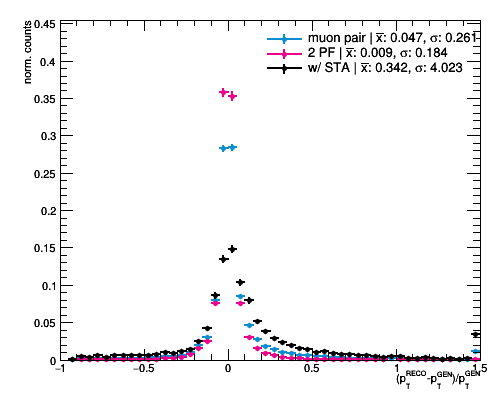

In [64]:
canvas.clear()


mupm_ptreso.color=sigCOLORS[0]
mupm_ptreso_type1.color=sigCOLORS[1]
mupm_ptreso_type2.color=sigCOLORS[2]

for h in [mupm_ptreso, mupm_ptreso_type1, mupm_ptreso_type2]:
    h.markersize=0.5
    h.linewidth=2

draw([mupm_ptreso, mupm_ptreso_type1, mupm_ptreso_type2], pad=canvas, #xlimits=(-1, 1.5),
     xtitle='(p^{RECO}_{T}-p^{GEN}_{T})/p^{GEN}_{T}', ytitle='norm. counts')
leg = Legend(3, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(mupm_ptreso, 'muon pair | #bar{x}: %.3f, #sigma: %.3f' % (mupm_ptreso.get_mean(), mupm_ptreso.get_std_dev()), 'LEP')
leg.AddEntry(mupm_ptreso_type1, '2 PF | #bar{x}: %.3f, #sigma: %.3f' % (mupm_ptreso_type1.get_mean(), mupm_ptreso_type1.get_std_dev()), 'LEP')
leg.AddEntry(mupm_ptreso_type2, 'w/ STA | #bar{x}: %.3f, #sigma: %.3f' % (mupm_ptreso_type2.get_mean(), mupm_ptreso_type2.get_std_dev()), 'LEP')
leg.Draw()
canvas.draw()